In [1]:
%load_ext autoreload
%load_ext autotime
%autoreload 2

## Imports and Project Path

In [2]:
# importing packages
import os, sys
import pandas as pd
import numpy as np
import sqlite3

# setting project path
gparent = os.path.join(os.pardir, os.pardir)
sys.path.append(gparent)

from IPython.display import Audio
sound_file = '/Users/dsbox/Documents/Flatiron/phase_5/WAILERLP.wav'

from dython.nominal import associations

from src import class_Database as d
from src import helper_functions as f
from src import visualizations as v

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme('talk')
plt.style.use('fivethirtyeight')
sns.set_palette('GnBu_r')
pd.options.display.max_rows = 300

time: 11 s


## Creating The Database

In [3]:
# creating database & database class instance
database_name = 'outcomes.db'
db = d.Database(database_name)

time: 9.65 ms


**Run The Cell Below Once And Then Comment Out**

In [4]:
# file_name = 'anonymisedData.zip'
# db.populate(file_name, database_name)

time: 531 µs


## Creating SQL `conn`, `cur`

In [5]:
data_path = os.path.join(gparent,'data/processed','outcomes.db')
conn = sqlite3.connect(data_path)  
cur = conn.cursor()

time: 14.7 ms


### Database ERD

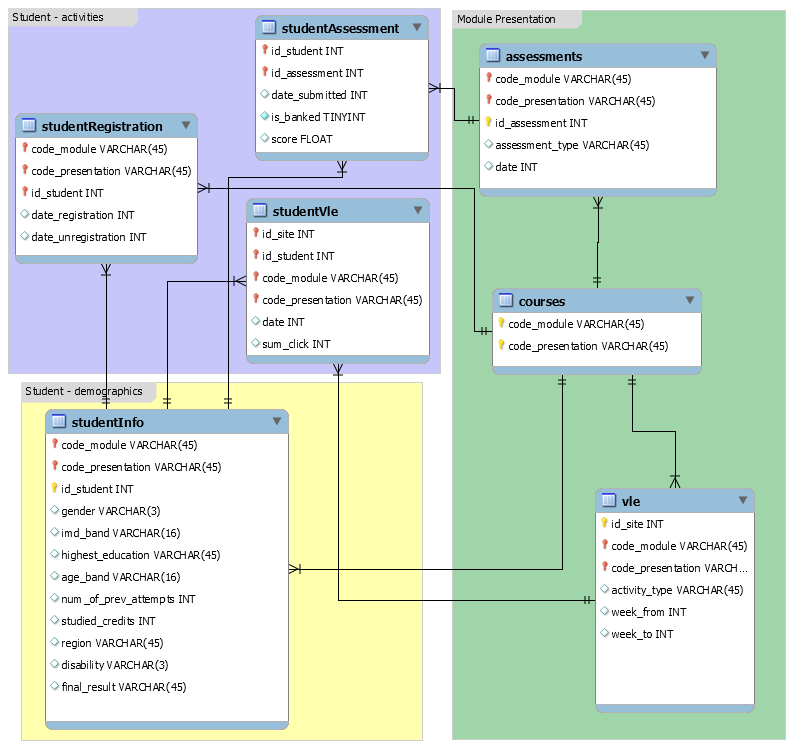

time: 3.77 ms


In [6]:
db.erd

# Half Term Data Experiments

## Registration Data

In [7]:
# creating registration data df
q="""
SELECT date_registration, date_unregistration,
code_module || code_presentation || id_student AS row_id
FROM STUDENTREGISTRATION"""
half_reg = pd.read_sql(q, conn)

time: 89.1 ms


In [8]:
# checking info
half_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_registration    32548 non-null  object
 1   date_unregistration  10072 non-null  object
 2   row_id               32593 non-null  object
dtypes: object(3)
memory usage: 764.0+ KB
time: 10.7 ms


In [9]:
# checking first five rows
half_reg.head()

,date_registration,date_unregistration,row_id
0,-159,None,AAA2013J11391
1,-53,None,AAA2013J28400
2,-92,12,AAA2013J30268
3,-52,None,AAA2013J31604
4,-176,None,AAA2013J32885


time: 21.1 ms


In [10]:
# converting datatypes
converts = ['date_registration', 'date_unregistration']
half_reg[converts] = half_reg[converts].apply(pd.to_numeric)

time: 31.4 ms


In [11]:
half_reg.describe()

,date_registration,date_unregistration
count,32548.000000,10072.000000
mean,-69.411300,49.757645
std,49.260522,82.460890
min,-322.000000,-365.000000
25%,-100.000000,-2.000000
50%,-57.000000,27.000000
75%,-29.000000,109.000000
max,167.000000,444.000000


time: 13.6 ms


## After Midpoint Data df

In [12]:
# filtering out withdrawls before the halfway point 
after_date = half_reg[(half_reg.date_unregistration.isna())|(half_reg.date_unregistration > 120)]

time: 40.4 ms


In [13]:
# checking uniques
after_date.date_unregistration.unique()

array([ nan, 175., 135., 144., 129., 158., 191., 123., 185., 166., 170.,
       187., 177., 160., 202., 172., 128., 241., 173., 203., 240., 138.,
       163., 178., 242., 220., 219., 199., 164., 235., 207., 143., 234.,
       201., 229., 132., 165., 227., 174., 150., 228., 180., 182., 213.,
       146., 226., 153., 139., 157., 208., 198., 200., 136., 137., 152.,
       130., 121., 145., 195., 156., 159., 216., 212., 209., 223., 188.,
       167., 125., 148., 149., 122., 222., 183., 184., 179., 124., 206.,
       142., 186., 154., 168., 215., 217., 236., 192., 171., 214., 221.,
       237., 140., 131., 189., 194., 224., 169., 151., 205., 127., 197.,
       147., 193., 230., 190., 133., 134., 161., 126., 225., 162., 204.,
       141., 211., 239., 196., 155., 233., 210., 218., 181., 232., 231.,
       176., 444.])

time: 3.91 ms


In [14]:
# checking info
after_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24777 entries, 0 to 32592
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_registration    24770 non-null  float64
 1   date_unregistration  2256 non-null   float64
 2   row_id               24777 non-null  object 
dtypes: float64(2), object(1)
memory usage: 774.3+ KB
time: 7.46 ms


In [15]:
# filtering row_ids with no registration data
after_date = after_date[~after_date.date_registration.isna()]

time: 2.21 ms


In [16]:
# checking work
after_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24770 entries, 0 to 32592
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_registration    24770 non-null  float64
 1   date_unregistration  2255 non-null   float64
 2   row_id               24770 non-null  object 
dtypes: float64(2), object(1)
memory usage: 774.1+ KB
time: 7.71 ms


## Student Assessment Data

In [17]:
# creating Student Assessment df
half_sa = db.simple_df('STUDENTASSESSMENT')

time: 345 ms


In [18]:
# checking info
half_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id_assessment   173912 non-null  object
 1   id_student      173912 non-null  object
 2   date_submitted  173912 non-null  object
 3   is_banked       173912 non-null  object
 4   score           173739 non-null  object
dtypes: object(5)
memory usage: 6.6+ MB
time: 44.2 ms


In [19]:
# converting data types
converts = ['date_submitted', 'score']
half_sa[converts] = half_sa[converts].apply(pd.to_numeric)

time: 181 ms


In [20]:
# checking work
half_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  object 
 1   id_student      173912 non-null  object 
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  object 
 4   score           173739 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.6+ MB
time: 26.5 ms


In [21]:
# checking number of unique student ids
len(half_sa.id_student.unique())

23369

time: 18.4 ms


In [22]:
# checking summary statistics
half_sa.describe()

,date_submitted,score
count,173912.000000,173739.000000
mean,116.032942,75.799573
std,71.484148,18.798107
min,-11.000000,0.000000
25%,51.000000,65.000000
50%,116.000000,80.000000
75%,173.000000,90.000000
max,608.000000,100.000000


time: 21.9 ms


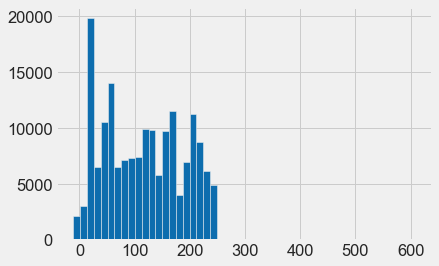

time: 436 ms


In [23]:
half_sa.date_submitted.hist(bins=50);

In [24]:
# filtering out submissions after half-term
half_sa = half_sa[half_sa.date_submitted < 120]

time: 13.1 ms


In [25]:
# re-checking unique student ids
len(half_sa.id_student.unique())

23316

time: 11.6 ms


## Median Score DF

In [26]:
# creating median_score df
median_score = half_sa.groupby(['id_student'])['score'].median().reset_index(name='median_score')

time: 32.3 ms


## Student Info & Student Assessment Data 

In [27]:
q = """
SELECT
/*SA.id_assessment,*/
/*SA.date_submitted,*/
SA.score,
/*selecting all from multiple tables*/
SI.*,
/*changing dtype*/
CAST(SA.date_submitted AS INTEGER) AS date_sub,
/*adding course length*/
CAST(C.module_presentation_length AS INTEGER) AS course_length,
/* creating the row_id column by concatenation*/
SI.code_module || SI.code_presentation || SI.id_student AS row_id,
/* creating binarized target column*/
iif(SI.final_result='Pass' OR SI.final_result='Distinction', 0, 1) AS target,
/* creating weighted_ave column*/
SUM(SA.score*A.weight*.01) AS weighted_ave,
/* creating mean_score column*/
AVG(SA.score) as mean_score
FROM STUDENTASSESSMENT AS SA
JOIN
ASSESSMENTS AS A
ON A.id_assessment = SA.id_assessment
JOIN STUDENTINFO AS SI
ON SI.id_student = SA.id_student
JOIN COURSES AS C
ON SI.code_module = C.code_module
WHERE date_sub < 120
GROUP BY SA.id_student,
SI.code_module,
SI.code_presentation;
"""
q1_si_sa = pd.read_sql(q, conn)

time: 1.21 s


In [28]:
# checking info
q1_si_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26692 entries, 0 to 26691
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   score                 26643 non-null  object 
 1   code_module           26692 non-null  object 
 2   code_presentation     26692 non-null  object 
 3   id_student            26692 non-null  object 
 4   gender                26692 non-null  object 
 5   region                26692 non-null  object 
 6   highest_education     26692 non-null  object 
 7   imd_band              25679 non-null  object 
 8   age_band              26692 non-null  object 
 9   num_of_prev_attempts  26692 non-null  object 
 10  studied_credits       26692 non-null  object 
 11  disability            26692 non-null  object 
 12  final_result          26692 non-null  object 
 13  date_sub              26692 non-null  int64  
 14  course_length         26692 non-null  int64  
 15  row_id             

In [29]:
# checking summary stats
q1_si_sa.describe()

,date_sub,course_length,target,weighted_ave,mean_score
count,26692.000000,26692.000000,26692.000000,26673.000000,26673.000000
mean,25.178406,239.672411,0.424697,108.957218,74.176317
std,13.932813,5.421583,0.494306,73.455695,16.015786
min,-11.000000,234.000000,0.000000,0.000000,0.000000
25%,18.000000,240.000000,0.000000,56.000000,66.000000
50%,21.000000,240.000000,0.000000,111.200000,77.500000
75%,31.000000,241.000000,1.000000,155.200000,85.555556
max,119.000000,268.000000,1.000000,663.660000,100.000000


time: 20.5 ms


In [30]:
# checking first 5 rows
q1_si_sa.head()

,score,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_sub,course_length,row_id,target,weighted_ave,mean_score
0,92,FFF,2013J,100064,F,West Midlands Region,A Level or Equivalent,0-10%,35-55,0,60,N,Pass,40,240,FFF2013J100064,0,186.00,92.666667
1,78,BBB,2013J,100282,F,Wales,Lower Than A Level,20-30%,0-35,1,120,N,Withdrawn,19,234,BBB2013J100282,1,15.60,78.000000
2,70,DDD,2014J,100561,M,East Anglian Region,Lower Than A Level,70-80%,0-35,1,60,N,Fail,20,240,DDD2014J100561,1,163.00,78.000000
3,78,FFF,2014B,1006742,M,Scotland,HE Qualification,80-90%,55<=,1,120,N,Fail,21,240,FFF2014B1006742,1,39.00,78.500000
4,100,CCC,2014J,100788,M,Scotland,HE Qualification,80-90%,0-35,1,60,N,Distinction,21,241,CCC2014J100788,0,106.18,92.125000


time: 12.4 ms


## Dealing With Weighted Average Outliers

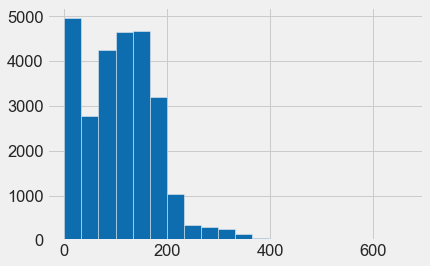

time: 122 ms


In [31]:
# checking distribution
q1_si_sa.weighted_ave.hist(bins=20);

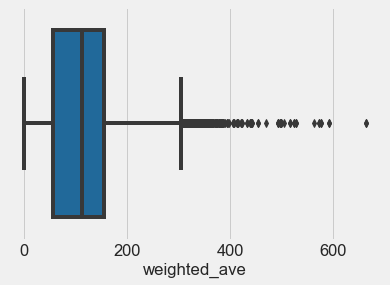

time: 88.2 ms


In [32]:
# checking boxplot for outliers
sns.boxplot(x=q1_si_sa['weighted_ave']);

In [33]:
# checking shape
q1_si_sa.shape

(26692, 19)

time: 2.06 ms


In [34]:
# interquartile range
Q1 = q1_si_sa.weighted_ave.quantile(0.25)
Q3 = q1_si_sa.weighted_ave.quantile(0.75)
IQR = Q3 - Q1
IQR

99.19999999999999

time: 4.91 ms


In [35]:
# filtering out outliers
q1_si_sa = q1_si_sa[~((q1_si_sa.weighted_ave < (Q1 - 1.5 * IQR))\
                              |(q1_si_sa.weighted_ave > (Q3 + 1.5 * IQR)))].copy()

time: 13.8 ms


In [36]:
# checking shape
q1_si_sa.shape

(26264, 19)

time: 1.85 ms


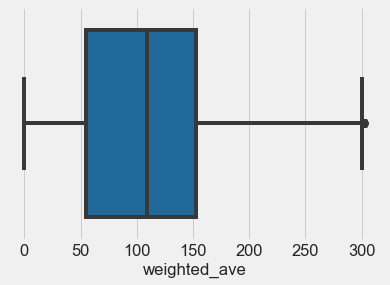

time: 102 ms


In [37]:
# rechecking boxplot
sns.boxplot(x=q1_si_sa['weighted_ave']);

In [38]:
# checking summary statistics
q1_si_sa.weighted_ave.describe()

count    26245.000000
mean       104.953112
std         66.574956
min          0.000000
25%         54.480000
50%        109.560000
75%        153.000000
max        303.840000
Name: weighted_ave, dtype: float64

time: 5.6 ms


## StudentVLE

In [39]:
# adding row_id, click_sum, num_activities
q="""
SELECT
CAST(SV.date AS INTEGER) AS date,
SV.*,
/* creating the row_id column by concatenation*/
SV.code_module || SV.code_presentation || SV.id_student AS row_id,
/* creating the click_sum column*/
SUM(SV.sum_click) AS click_sum,
/* creating the num_activities column*/
COUNT(SV.sum_click) AS num_activities
FROM
STUDENTVLE AS SV
WHERE
date < 120
GROUP BY 
SV.code_module,
SV.code_presentation,
SV.id_student;
"""
svc = pd.read_sql(q, conn)

time: 5.31 s


In [40]:
# checking info
svc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27800 entries, 0 to 27799
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               27800 non-null  int64 
 1   code_module        27800 non-null  object
 2   code_presentation  27800 non-null  object
 3   id_student         27800 non-null  object
 4   id_site            27800 non-null  object
 5   date               27800 non-null  object
 6   sum_click          27800 non-null  object
 7   row_id             27800 non-null  object
 8   click_sum          27800 non-null  int64 
 9   num_activities     27800 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.1+ MB
time: 25.7 ms


In [41]:
# checking summary statistics
svc.describe()

,date,click_sum,num_activities
count,27800.000000,27800.000000,27800.000000
mean,-5.326475,215.103741,63.377842
std,25.380912,292.576489,66.036136
min,-25.000000,1.000000,1.000000
25%,-17.000000,41.000000,18.000000
50%,-10.000000,116.000000,42.000000
75%,-5.000000,272.000000,85.250000
max,119.000000,5675.000000,658.000000


time: 21 ms


## Megring Median Score Data

In [42]:
# merging median-scores to sv_si
q1_si_sa = q1_si_sa.merge(median_score, on='id_student')

time: 40.6 ms


In [43]:
# checking info
q1_si_sa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26264 entries, 0 to 26263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   score                 26215 non-null  object 
 1   code_module           26264 non-null  object 
 2   code_presentation     26264 non-null  object 
 3   id_student            26264 non-null  object 
 4   gender                26264 non-null  object 
 5   region                26264 non-null  object 
 6   highest_education     26264 non-null  object 
 7   imd_band              25287 non-null  object 
 8   age_band              26264 non-null  object 
 9   num_of_prev_attempts  26264 non-null  object 
 10  studied_credits       26264 non-null  object 
 11  disability            26264 non-null  object 
 12  final_result          26264 non-null  object 
 13  date_sub              26264 non-null  int64  
 14  course_length         26264 non-null  int64  
 15  row_id             

In [44]:
# dropping extraneous cols
drops = ['code_module','code_presentation','id_student']
q1_si_sa = q1_si_sa.drop(drops, axis=1)

time: 18.5 ms


## Merging StudentVLE & Course Length Data

In [45]:
# dropping extraneous cols
drops = ['code_module','code_presentation','id_student']
svc = svc.drop(drops, axis=1)

# merging
q1 = q1_si_sa.merge(svc, on='row_id')

time: 53.1 ms


In [46]:
# checking info
q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24976 entries, 0 to 24975
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   score                 24940 non-null  object 
 1   gender                24976 non-null  object 
 2   region                24976 non-null  object 
 3   highest_education     24976 non-null  object 
 4   imd_band              24015 non-null  object 
 5   age_band              24976 non-null  object 
 6   num_of_prev_attempts  24976 non-null  object 
 7   studied_credits       24976 non-null  object 
 8   disability            24976 non-null  object 
 9   final_result          24976 non-null  object 
 10  date_sub              24976 non-null  int64  
 11  course_length         24976 non-null  int64  
 12  row_id                24976 non-null  object 
 13  target                24976 non-null  int64  
 14  weighted_ave          24963 non-null  float64
 15  mean_score         

In [56]:
q1.course_length.value_counts()

240.0    9510
241.0    6747
234.0    5290
268.0     672
Name: course_length, dtype: int64

time: 5.95 ms


## Merging After Midpoint Data

In [47]:
# merging after midpoint data
q1 = q1.merge(after_date, how='right', on='row_id')

time: 151 ms


In [48]:
# checking info
q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24770 entries, 0 to 24769
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   score                 22202 non-null  object 
 1   gender                22219 non-null  object 
 2   region                22219 non-null  object 
 3   highest_education     22219 non-null  object 
 4   imd_band              21332 non-null  object 
 5   age_band              22219 non-null  object 
 6   num_of_prev_attempts  22219 non-null  object 
 7   studied_credits       22219 non-null  object 
 8   disability            22219 non-null  object 
 9   final_result          22219 non-null  object 
 10  date_sub              22219 non-null  float64
 11  course_length         22219 non-null  float64
 12  row_id                24770 non-null  object 
 13  target                22219 non-null  float64
 14  weighted_ave          22217 non-null  float64
 15  mean_score         

In [49]:
# checking summary statistics
q1.describe()

,date_sub,course_length,target,weighted_ave,mean_score,median_score,date,click_sum,num_activities,date_registration,date_unregistration
count,22219.000000,22219.000000,22219.000000,22217.000000,22217.000000,22217.000000,22219.000000,22219.000000,22219.000000,24770.000000,2255.000000
mean,25.178541,239.721995,0.327918,113.110186,75.296531,75.653936,-4.346325,243.091273,70.695846,-65.488736,170.795565
std,14.311197,5.701796,0.469465,65.361515,14.850148,14.772224,27.225546,307.476607,67.925893,47.117116,33.475645
min,-11.000000,234.000000,0.000000,0.000000,0.000000,0.000000,-25.000000,1.000000,1.000000,-311.000000,121.000000
25%,18.000000,240.000000,0.000000,68.800000,67.666667,68.000000,-17.000000,56.000000,23.000000,-94.000000,144.000000
50%,21.000000,240.000000,0.000000,120.560000,78.333333,78.000000,-10.000000,140.000000,50.000000,-52.000000,165.000000
75%,31.000000,241.000000,1.000000,159.000000,86.000000,86.000000,-5.000000,313.000000,95.000000,-29.000000,198.000000
max,119.000000,268.000000,1.000000,303.840000,100.000000,100.000000,119.000000,5675.000000,658.000000,167.000000,444.000000


time: 49.4 ms


In [50]:
# outputting data to csv file
path = os.path.join(gparent, 'data/processed/q2.csv')
q1.to_csv(path, index=False)

time: 312 ms


In [51]:
Audio(sound_file, autoplay=True)

time: 39.6 ms


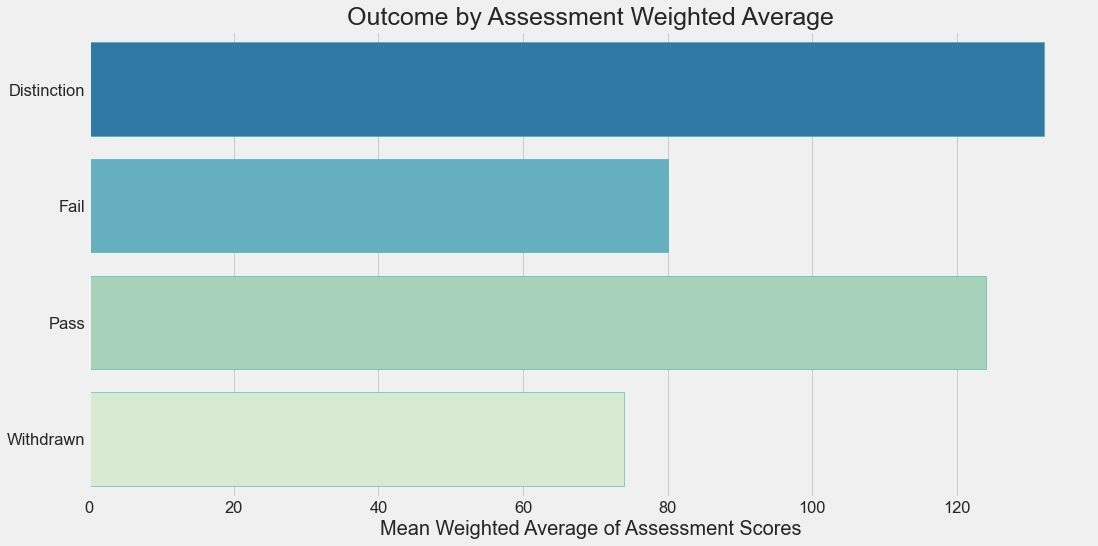

time: 200 ms


In [52]:
v.outcomes_wa(q1_si_sa)

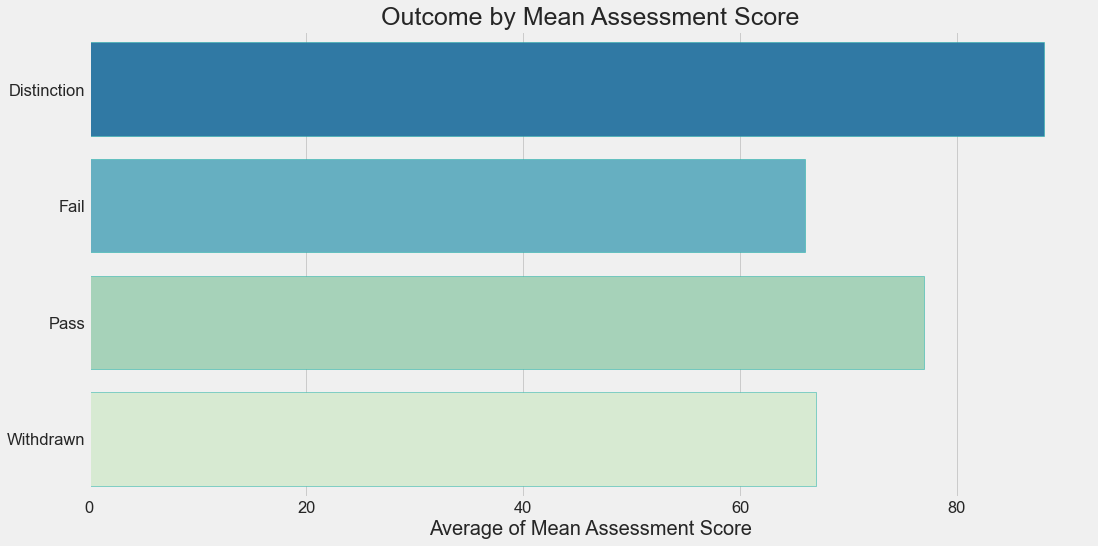

time: 218 ms


In [53]:
v.outcomes_mean(q1_si_sa)